In [ ]:
!pip install pyspark
!pip install findspark

import findspark
findspark.init()

In [ ]:
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
spark = SparkSession.builder.appName('stocks').getOrCreate()

## **1. EXPLORATORY ANALYSIS**
### **1.1 Uploading data into a pandas dataframe for exploratory analysis**<br>
### **1.2 Performing Exploratory Analysis**<br>
  </t>1.2.1 What are the most profitable stocks? <br>
  </t>1.2.2 What are the consistently growing stocks? <br>
  </t>1.2.3 Correlations among stocks <br>
  </t>1.2.4 Using Moving Averages for stock trend analysis <br>
  </t>1.2.5 RSI Analysis<br>
  </t> 1.2.6 Combining RSI and MAs for further analysis

**1.1 Uploading data into a pandas dataframe for exploratory analysis**

In [ ]:
stock_df=pd.read_csv('/content/drive/MyDrive/bigdata/all_stocks_5yr.csv')

In [ ]:
stock_df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [ ]:
stock_df.dtypes

,0
date,object
open,float64
high,float64
low,float64
close,float64
volume,int64
Name,object


In [ ]:
#changing date to type datetime and Name to string
stock_df['date'] = pd.to_datetime(stock_df['date'])
stock_df['Name'] = stock_df['Name'].astype(str)
stock_df.dtypes

,0
date,datetime64[ns]
open,float64
high,float64
low,float64
close,float64
volume,int64
Name,object


In [ ]:
#checking if 'Name' is string or not
print(stock_df['Name'].apply(type).unique())


[<class 'str'>]


In [ ]:
stock_df.describe()

,date,open,high,low,close,volume
count,619040,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,2015-08-18 00:48:23.494443264,83.023334,83.778311,82.256096,83.043763,4.321823e+06
min,2013-02-08 00:00:00,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,2014-05-20 00:00:00,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,2015-08-21 00:00:00,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,2016-11-15 00:00:00,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2018-02-07 00:00:00,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08
std,NaN,97.378769,98.207519,96.507421,97.389748,8.693610e+06


In [ ]:
stock_df['year'] = stock_df['date'].dt.year  # Extract year from the 'date' column. necessary for future analysis
stock_df.head()

,date,open,high,low,close,volume,Name,year
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,2013
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013


**1.2 Performing Exploratory Analysis**

In [ ]:
df_pandas=stock_df.copy()
df_pandas.head()

,date,open,high,low,close,volume,Name,year
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,2013
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,2013
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,2013
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2013
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,2013


In [ ]:
unique_companies = df_pandas["Name"].unique()
print(unique_companies)


['AAL' 'AAPL' 'AAP' 'ABBV' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADSK' 'ADS' 'AEE' 'AEP' 'AES' 'AET' 'AFL' 'AGN' 'AIG' 'AIV' 'AIZ' 'AJG'
 'AKAM' 'ALB' 'ALGN' 'ALK' 'ALLE' 'ALL' 'ALXN' 'AMAT' 'AMD' 'AME' 'AMGN'
 'AMG' 'AMP' 'AMT' 'AMZN' 'ANDV' 'ANSS' 'ANTM' 'AON' 'AOS' 'APA' 'APC'
 'APD' 'APH' 'APTV' 'ARE' 'ARNC' 'ATVI' 'AVB' 'AVGO' 'AVY' 'AWK' 'AXP'
 'AYI' 'AZO' 'A' 'BAC' 'BAX' 'BA' 'BBT' 'BBY' 'BDX' 'BEN' 'BF.B' 'BHF'
 'BHGE' 'BIIB' 'BK' 'BLK' 'BLL' 'BMY' 'BRK.B' 'BSX' 'BWA' 'BXP' 'CAG'
 'CAH' 'CAT' 'CA' 'CBG' 'CBOE' 'CBS' 'CB' 'CCI' 'CCL' 'CDNS' 'CELG' 'CERN'
 'CFG' 'CF' 'CHD' 'CHK' 'CHRW' 'CHTR' 'CINF' 'CI' 'CLX' 'CL' 'CMA' 'CMCSA'
 'CME' 'CMG' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COL' 'COO' 'COP' 'COST'
 'COTY' 'CPB' 'CRM' 'CSCO' 'CSRA' 'CSX' 'CTAS' 'CTL' 'CTSH' 'CTXS' 'CVS'
 'CVX' 'CXO' 'C' 'DAL' 'DE' 'DFS' 'DGX' 'DG' 'DHI' 'DHR' 'DISCA' 'DISCK'
 'DISH' 'DIS' 'DLR' 'DLTR' 'DOV' 'DPS' 'DRE' 'DRI' 'DTE' 'DUK' 'DVA' 'DVN'
 'DWDP' 'DXC' 'D' 'EA' 'EBAY' 'ECL' 'ED' 'EFX' 'EIX' 'E

In [ ]:
num_companies = df_pandas["Name"].nunique()
print(f"Number of companies in the dataset: {num_companies}")


Number of companies in the dataset: 505


**1.2.1 What are the most profitable stocks**

In [ ]:
df_pandas["DailyReturn"] = ((df_pandas["close"] - df_pandas["open"]) / df_pandas["open"]) * 100


In [ ]:
most_profitable = df_pandas.groupby(["Name", "year"]).agg(
    TotalProfit=("DailyReturn", "sum"),
    AvgClose=("close", "mean")
).reset_index()


In [ ]:
top_stock = most_profitable.sort_values(by="TotalProfit", ascending=False).head()
print(top_stock)


      Name  year  TotalProfit   AvgClose
1432  INCY  2013    96.743665  30.186717
2067   OKE  2016    96.403006  41.166667
552    CHD  2014    87.703952  34.655913
195    AMD  2016    80.633772   5.254782
1353   HPE  2016    70.364085  19.078373


**What are the most profitable stocks in each year?**

In [ ]:
most_profitable_per_year = most_profitable.loc[most_profitable.groupby("year")["TotalProfit"].idxmax()]
print(most_profitable_per_year)

      Name  year  TotalProfit   AvgClose
1432  INCY  2013    96.743665  30.186717
552    CHD  2014    87.703952  34.655913
236   ANDV  2015    56.202707  94.060675
2067   OKE  2016    96.403006  41.166667
300   ARNC  2017    54.442443  25.629044
1764   MAT  2018    25.175217  16.087308


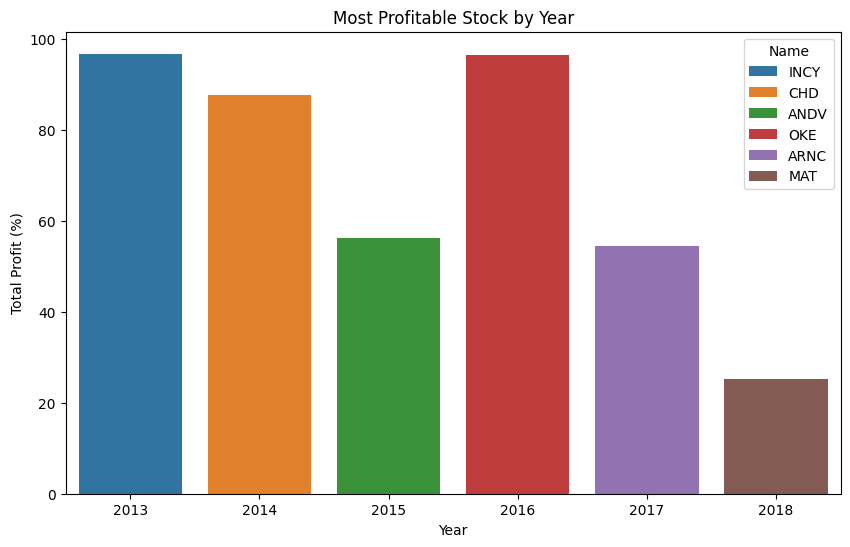

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=most_profitable_per_year, x="year", y="TotalProfit", hue="Name", dodge=False)
plt.title("Most Profitable Stock by Year")
plt.ylabel("Total Profit (%)")
plt.xlabel("Year")
plt.show()


**1.2.2 What are the consistently growing stocks?**

In [ ]:
most_profitable = most_profitable.sort_values(by=["Name", "year"]).reset_index(drop=True)
most_profitable["ProfitChange"] = most_profitable.groupby("Name")["TotalProfit"].diff()


In [ ]:
consistent_growth = (
    most_profitable.groupby("Name")["ProfitChange"]
    .apply(lambda x: (x.dropna() > 0).all())  # Checking if all ProfitChange > 0
    .reset_index(name="ConsistentGrowth")
)

In [ ]:
consistently_growing_stocks = consistent_growth[consistent_growth["ConsistentGrowth"] == True]

print(consistently_growing_stocks)

     Name  ConsistentGrowth
48   APTV              True
67    BHF              True
68   BHGE              True
151  DWDP              True
453    UA              True


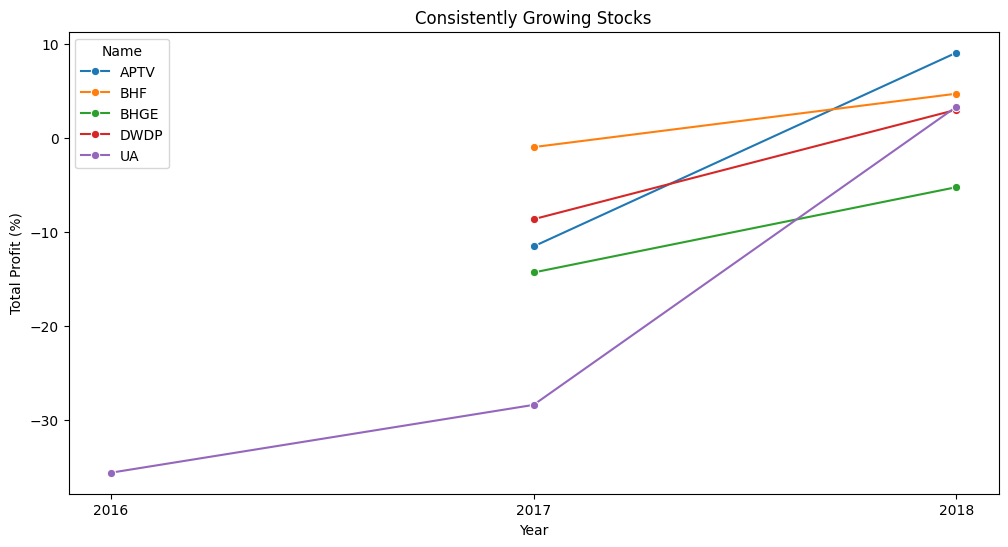

In [ ]:
consistent_data = most_profitable[most_profitable["Name"].isin(consistently_growing_stocks["Name"])]

plt.figure(figsize=(12, 6))
sns.lineplot(data=consistent_data, x="year", y="TotalProfit", hue="Name", marker="o")

years = consistent_data["year"].unique().astype(int)
plt.xticks(ticks=years, labels=years)

plt.title("Consistently Growing Stocks")
plt.ylabel("Total Profit (%)")
plt.xlabel("Year")

plt.show()


**1.2.3 What is the correlation among stocks?**

In [ ]:
#Calculating daily returns grouped by Name
df_pandas['DailyReturn'] = df_pandas.groupby('Name')['close'].pct_change()

#Pivoting the DataFrame to get 'DailyReturn' as a matrix with 'Name' as columns
returns_pivot = df_pandas.pivot_table(values='DailyReturn', index='date', columns='Name')

# Drop rows with NaN values (arising from pct_change)
returns_pivot = returns_pivot.dropna()

print(returns_pivot.head())


Name               A       AAL       AAP      AAPL      ABBV       ABC  \
date                                                                     
2017-12-06  0.000911  0.002830 -0.036085 -0.003714 -0.010586  0.001164   
2017-12-07  0.012445  0.025600  0.001128  0.001834 -0.001695 -0.000698   
2017-12-08  0.010043  0.002752  0.027661  0.000295  0.018145  0.008961   
2017-12-11 -0.005640  0.005488  0.005383  0.019484  0.005419  0.000807   
2017-12-12  0.000896 -0.016179  0.021616 -0.005618 -0.001762  0.012101   

Name             ABT       ACN      ADBE       ADI  ...        XL      XLNX  \
date                                                ...                       
2017-12-06 -0.002373  0.004063  0.035693  0.006837  ...  0.003483 -0.000438   
2017-12-07  0.000549  0.002226  0.006282  0.008196  ... -0.019226  0.008919   
2017-12-08 -0.000914  0.012988 -0.005956 -0.006852  ...  0.003812 -0.006667   
2017-12-11  0.005490  0.001063  0.004263  0.003274  ... -0.001356 -0.002334   
2017-12

In [ ]:
# Computing the correlation matrix for the pivoted data
correlation_matrix = returns_pivot.corr()

print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
Name         A       AAL       AAP      AAPL      ABBV       ABC       ABT  \
Name                                                                         
A     1.000000  0.318771  0.460915  0.449194  0.471821  0.588136  0.558611   
AAL   0.318771  1.000000  0.308245  0.598168  0.048245  0.191883 -0.017178   
AAP   0.460915  0.308245  1.000000  0.502703  0.414300  0.399101  0.522497   
AAPL  0.449194  0.598168  0.502703  1.000000  0.231405  0.262580  0.240539   
ABBV  0.471821  0.048245  0.414300  0.231405  1.000000  0.440349  0.355300   
...        ...       ...       ...       ...       ...       ...       ...   
XYL   0.420828  0.073052  0.236101 -0.003638  0.507228  0.373597  0.419124   
YUM   0.678198  0.435096  0.531693  0.472241  0.424861  0.463384  0.432812   
ZBH   0.370001  0.075644  0.140804  0.160827  0.247024  0.467750  0.421852   
ZION  0.546767  0.491773  0.406436  0.363504  0.447226  0.418046  0.345824   
ZTS   0.644180  0.065838  0.401499  0.221463

In [ ]:
top_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
top_stocks = [index for index, _ in top_corr[:20].index]
filtered_corr = correlation_matrix.loc[top_stocks, top_stocks]

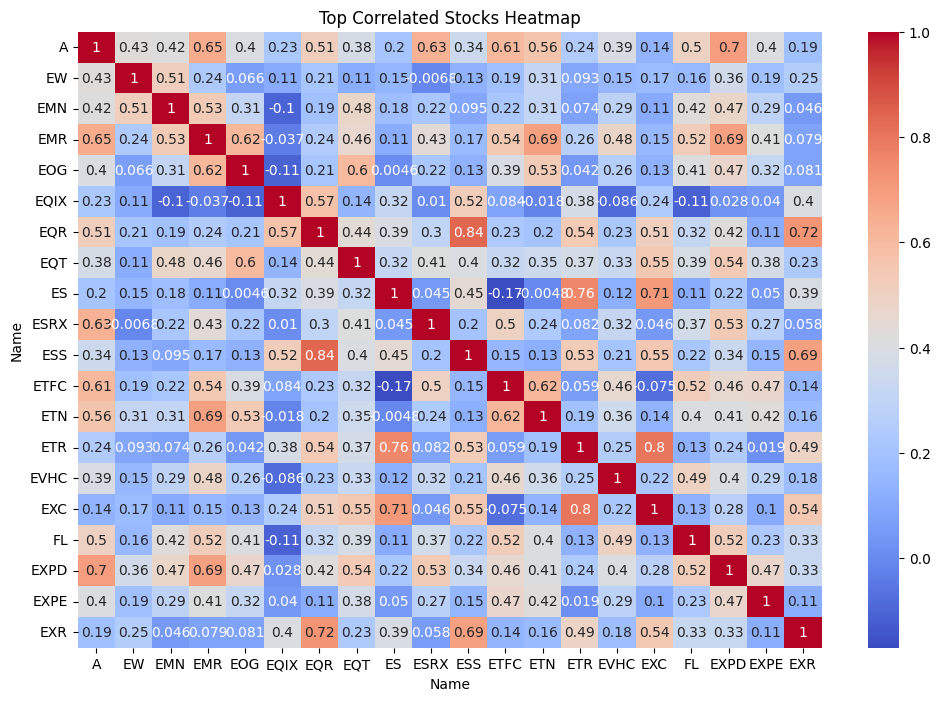

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, cmap='coolwarm', annot=True)
plt.title("Top Correlated Stocks Heatmap")
plt.show()

**1.2.4 Using Moving Averages for Stock Trend Analysis**

In [ ]:
df = df_pandas.sort_values(by=["Name", "date"])  # Sort by company and date

In [ ]:
#Adding moving averages for each company
df["50_day_ma"] = df.groupby("Name")["close"].transform(lambda x: x.rolling(window=50).mean())
df["200_day_ma"] = df.groupby("Name")["close"].transform(lambda x: x.rolling(window=200).mean())


In [ ]:
# Add trend column
df["trend"] = np.where(df["50_day_ma"] > df["200_day_ma"], "Bullish",
              np.where(df["50_day_ma"] < df["200_day_ma"], "Bearish", "Neutral"))


In [ ]:
df_aapl = df[df["Name"] == "AAPL"]

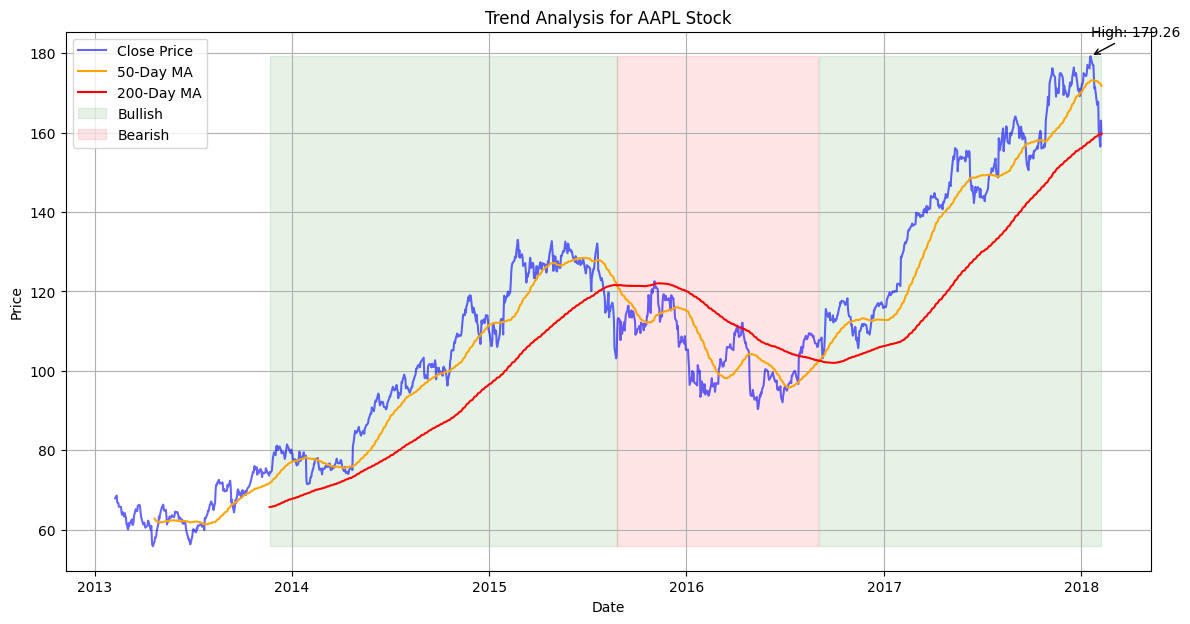

In [ ]:
plt.figure(figsize=(14, 7))

plt.plot(df_aapl["date"], df_aapl["close"], label="Close Price", color="blue", alpha=0.6)

plt.plot(df_aapl["date"], df_aapl["50_day_ma"], label="50-Day MA", color="orange")
plt.plot(df_aapl["date"], df_aapl["200_day_ma"], label="200-Day MA", color="red")

plt.fill_between(df_aapl["date"], df_aapl["close"].min(), df_aapl["close"].max(),
                 where=df_aapl["trend"] == "Bullish", color="green", alpha=0.1, label="Bullish")
plt.fill_between(df_aapl["date"], df_aapl["close"].min(), df_aapl["close"].max(),
                 where=df_aapl["trend"] == "Bearish", color="red", alpha=0.1, label="Bearish")

max_price_date = df_aapl["date"][df_aapl["close"].idxmax()]
max_price_value = df_aapl["close"].max()
plt.annotate(f"High: {max_price_value:.2f}",
             xy=(max_price_date, max_price_value),
             xytext=(max_price_date, max_price_value + 5),
             arrowprops=dict(facecolor='blue', arrowstyle='->'), fontsize=10)

plt.title("Trend Analysis for AAPL Stock")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


In [ ]:
df_amd = df[df["Name"] == "AMD"]


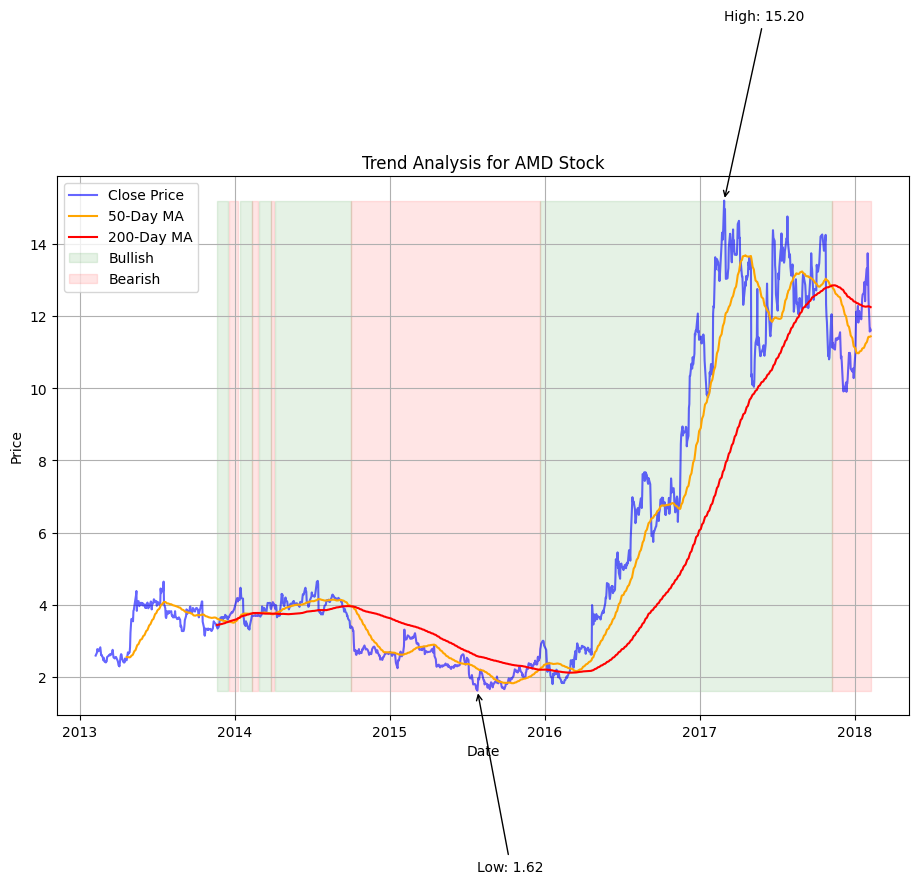

In [ ]:
plt.figure(figsize=(11, 7))

plt.plot(df_amd["date"], df_amd["close"], label="Close Price", color="blue", alpha=0.6)

plt.plot(df_amd["date"], df_amd["50_day_ma"], label="50-Day MA", color="orange")
plt.plot(df_amd["date"], df_amd["200_day_ma"], label="200-Day MA", color="red")

plt.fill_between(df_amd["date"], df_amd["close"].min(), df_amd["close"].max(),
                 where=df_amd["trend"] == "Bullish", color="green", alpha=0.1, label="Bullish")
plt.fill_between(df_amd["date"], df_amd["close"].min(), df_amd["close"].max(),
                 where=df_amd["trend"] == "Bearish", color="red", alpha=0.1, label="Bearish")

max_price_date = df_amd["date"][df_amd["close"].idxmax()]
max_price_value = df_amd["close"].max()
plt.annotate(f"High: {max_price_value:.2f}",
             xy=(max_price_date, max_price_value),
             xytext=(max_price_date, max_price_value + 5),
             arrowprops=dict(facecolor='blue', arrowstyle='->'), fontsize=10)

min_price_date = df_amd["date"][df_amd["close"].idxmin()]
min_price_value = df_amd["close"].min()
plt.annotate(f"Low: {min_price_value:.2f}",
             xy=(min_price_date, min_price_value),
             xytext=(min_price_date, min_price_value - 5),
             arrowprops=dict(facecolor='blue', arrowstyle='->'), fontsize=10)

plt.title("Trend Analysis for AMD Stock")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


**1.2.5 RSI Analysis**

In [ ]:
def compute_rsi(df, window=14):

    delta = df['close'].diff()  # Calculating daily returns

    #Separating gains and losses
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)

    #Computing average gains and losses
    avg_gain = pd.Series(gain).rolling(window=window, min_periods=window).mean()
    avg_loss = pd.Series(loss).rolling(window=window, min_periods=window).mean()

    # Calculating RS (Relative Strength)
    rs = avg_gain / avg_loss

    # Calculating RSI
    rsi = 100 - (100 / (1 + rs))

    return rsi


In [ ]:
# Applying RSI computation to each company
window = 14
df['RSI'] = df.groupby('Name').apply(lambda x: compute_rsi(x, window=window)).reset_index(drop=True)


<ipython-input-43-681e3bb21309>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['RSI'] = df.groupby('Name').apply(lambda x: compute_rsi(x, window=window)).reset_index(drop=True)


In [ ]:
df['RSI_Signal'] = np.where(df['RSI'] > 70, 'Overbought',
                   np.where(df['RSI'] < 30, 'Oversold', 'Neutral'))


In [ ]:
df_aapl = df[df['Name'] == 'AAPL']

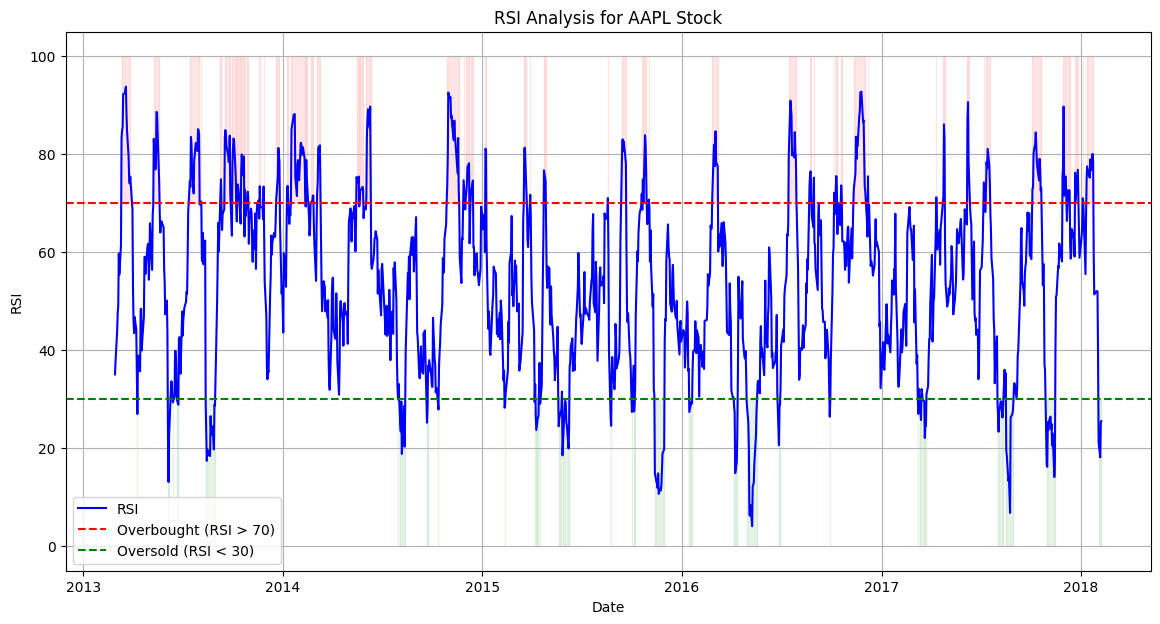

In [ ]:
plt.figure(figsize=(14, 7))

plt.plot(df_aapl['date'], df_aapl['RSI'], label='RSI', color='blue')

plt.axhline(70, color='red', linestyle='--', label='Overbought (RSI > 70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (RSI < 30)')

plt.fill_between(df_aapl['date'], 70, 100, where=(df_aapl['RSI'] > 70), color='red', alpha=0.1)
plt.fill_between(df_aapl['date'], 0, 30, where=(df_aapl['RSI'] < 30), color='green', alpha=0.1)

plt.title('RSI Analysis for AAPL Stock')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid()
plt.show()


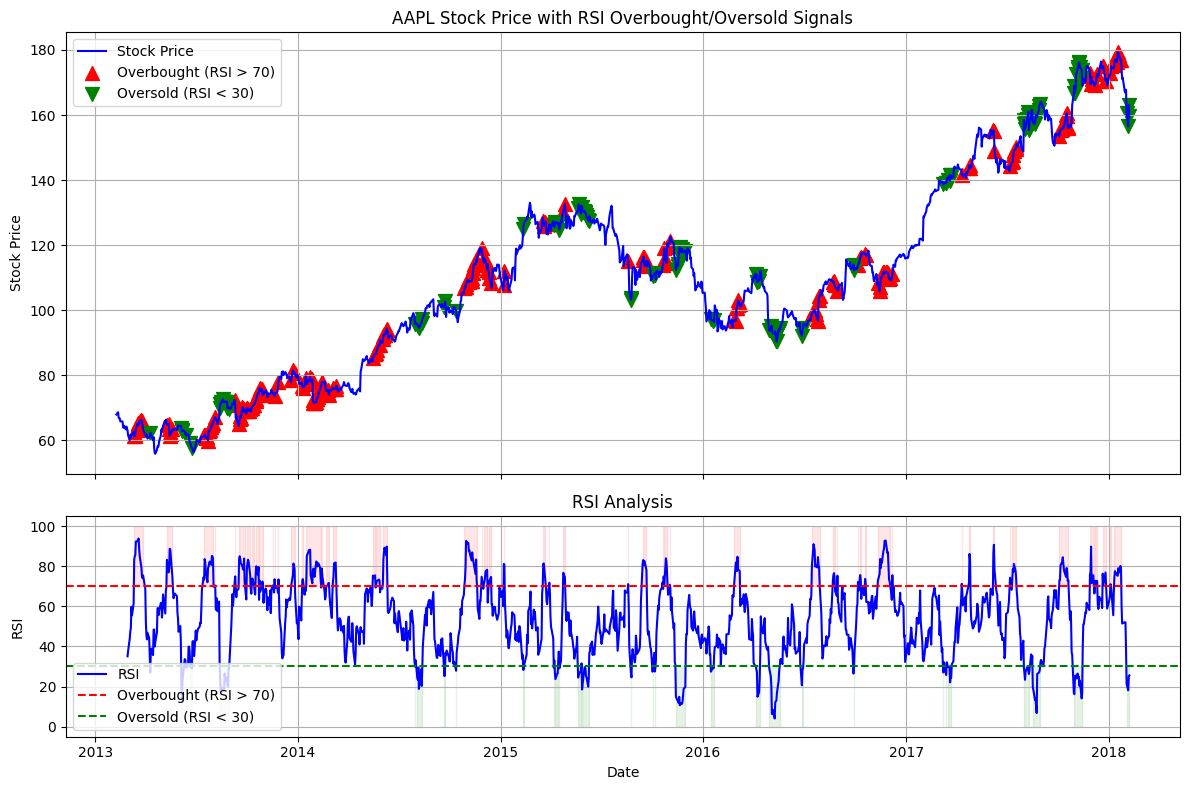

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

#Subplot 1: Stock Price Chart
ax[0].plot(df_aapl['date'], df_aapl['close'], label='Stock Price', color='blue')
ax[0].scatter(df_aapl['date'][df_aapl['RSI'] > 70],
              df_aapl['close'][df_aapl['RSI'] > 70],
              color='red', label='Overbought (RSI > 70)', marker='^', s=100)
ax[0].scatter(df_aapl['date'][df_aapl['RSI'] < 30],
              df_aapl['close'][df_aapl['RSI'] < 30],
              color='green', label='Oversold (RSI < 30)', marker='v', s=100)

ax[0].set_title('AAPL Stock Price with RSI Overbought/Oversold Signals')
ax[0].set_ylabel('Stock Price')
ax[0].legend()
ax[0].grid()

#Subplot 2: RSI Chart
ax[1].plot(df_aapl['date'], df_aapl['RSI'], label='RSI', color='blue')
ax[1].axhline(70, color='red', linestyle='--', label='Overbought (RSI > 70)')
ax[1].axhline(30, color='green', linestyle='--', label='Oversold (RSI < 30)')

ax[1].fill_between(df_aapl['date'], 70, 100, where=(df_aapl['RSI'] > 70), color='red', alpha=0.1)
ax[1].fill_between(df_aapl['date'], 0, 30, where=(df_aapl['RSI'] < 30), color='green', alpha=0.1)

ax[1].set_title('RSI Analysis')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('RSI')
ax[1].legend()
ax[1].grid()

plt.tight_layout()
plt.show()
#

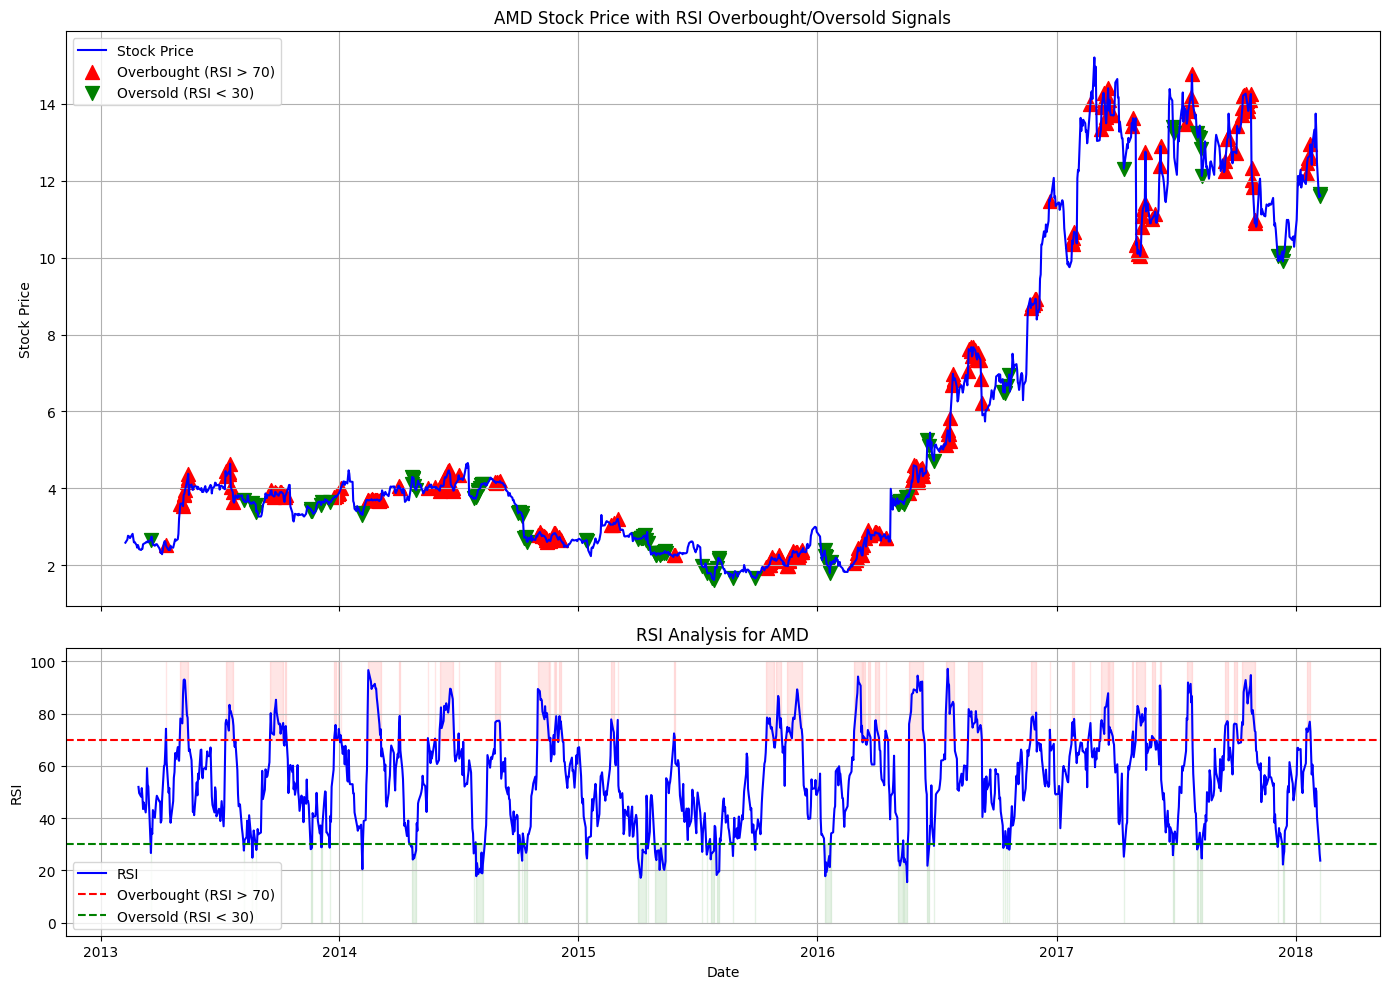

In [ ]:
#For AMD
df_amd = df[df['Name'] == 'AMD']

fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

#Subplot 1: AMD Stock Price Chart
ax[0].plot(df_amd['date'], df_amd['close'], label='Stock Price', color='blue')
ax[0].scatter(df_amd['date'][df_amd['RSI'] > 70],
              df_amd['close'][df_amd['RSI'] > 70],
              color='red', label='Overbought (RSI > 70)', marker='^', s=100)
ax[0].scatter(df_amd['date'][df_amd['RSI'] < 30],
              df_amd['close'][df_amd['RSI'] < 30],
              color='green', label='Oversold (RSI < 30)', marker='v', s=100)

ax[0].set_title('AMD Stock Price with RSI Overbought/Oversold Signals')
ax[0].set_ylabel('Stock Price')
ax[0].legend()
ax[0].grid()

# Subplot 2: AMD RSI Chart
ax[1].plot(df_amd['date'], df_amd['RSI'], label='RSI', color='blue')
ax[1].axhline(70, color='red', linestyle='--', label='Overbought (RSI > 70)')
ax[1].axhline(30, color='green', linestyle='--', label='Oversold (RSI < 30)')

ax[1].fill_between(df_amd['date'], 70, 100, where=(df_amd['RSI'] > 70), color='red', alpha=0.1)
ax[1].fill_between(df_amd['date'], 0, 30, where=(df_amd['RSI'] < 30), color='green', alpha=0.1)

ax[1].set_title('RSI Analysis for AMD')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('RSI')
ax[1].legend()
ax[1].grid()

plt.tight_layout()
plt.show()


**1.2.6 Combining RSI and MAs for further analysis**

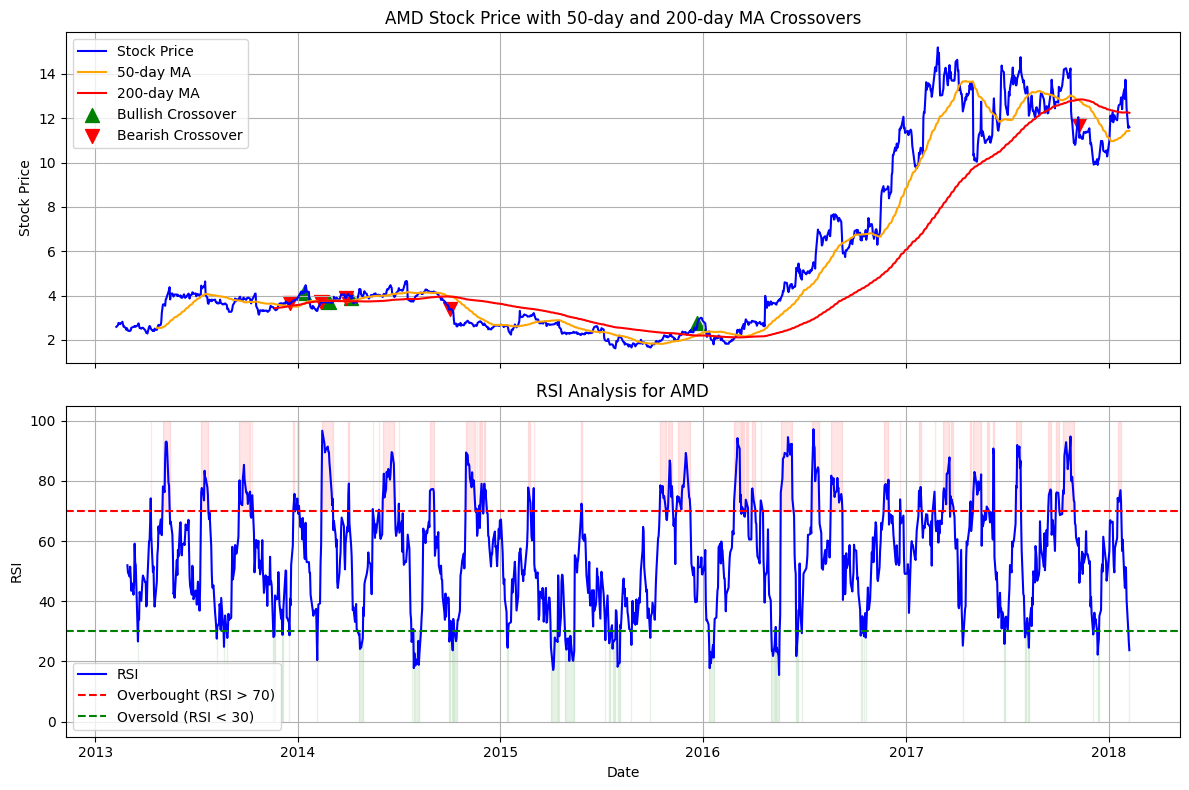

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
#Subplot 1: Stock Price with MA Crossovers
ax1.plot(df_amd['date'], df_amd['close'], label='Stock Price', color='blue')
ax1.plot(df_amd['date'], df_amd['50_day_ma'], label='50-day MA', color='orange')
ax1.plot(df_amd['date'], df_amd['200_day_ma'], label='200-day MA', color='red')

bullish = (df_amd['50_day_ma'] > df_amd['200_day_ma']) & (df_amd['50_day_ma'].shift(1) <= df_amd['200_day_ma'].shift(1))
bearish = (df_amd['50_day_ma'] < df_amd['200_day_ma']) & (df_amd['50_day_ma'].shift(1) >= df_amd['200_day_ma'].shift(1))

ax1.scatter(df_amd['date'][bullish], df_amd['close'][bullish], color='green', label='Bullish Crossover', marker='^', s=100)
ax1.scatter(df_amd['date'][bearish], df_amd['close'][bearish], color='red', label='Bearish Crossover', marker='v', s=100)

ax1.set_title('AMD Stock Price with 50-day and 200-day MA Crossovers')
ax1.set_ylabel('Stock Price')
ax1.legend()
ax1.grid()

# Subplot 2: AMD RSI Chart
ax2.plot(df_amd['date'], df_amd['RSI'], label='RSI', color='blue')
ax2.axhline(70, color='red', linestyle='--', label='Overbought (RSI > 70)')
ax2.axhline(30, color='green', linestyle='--', label='Oversold (RSI < 30)')
ax2.fill_between(df_amd['date'], 70, 100, where=(df_amd['RSI'] > 70), color='red', alpha=0.1)
ax2.fill_between(df_amd['date'], 0, 30, where=(df_amd['RSI'] < 30), color='green', alpha=0.1)

ax2.set_title('RSI Analysis for AMD')
ax2.set_xlabel('Date')
ax2.set_ylabel('RSI')
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()

**2. Creating PySpark Dataframe**

In [ ]:
stock_sc=spark.createDataFrame(stock_df)

In [ ]:
stock_sc.show()

+-------------------+-----+-----+-----+-----+--------+----+----+
|               date| open| high|  low|close|  volume|Name|year|
+-------------------+-----+-----+-----+-----+--------+----+----+
|2013-02-08 00:00:00|15.07|15.12|14.63|14.75| 8407500| AAL|2013|
|2013-02-11 00:00:00|14.89|15.01|14.26|14.46| 8882000| AAL|2013|
|2013-02-12 00:00:00|14.45|14.51| 14.1|14.27| 8126000| AAL|2013|
|2013-02-13 00:00:00| 14.3|14.94|14.25|14.66|10259500| AAL|2013|
|2013-02-14 00:00:00|14.94|14.96|13.16|13.99|31879900| AAL|2013|
|2013-02-15 00:00:00|13.93|14.61|13.93| 14.5|15628000| AAL|2013|
|2013-02-19 00:00:00|14.33|14.56|14.08|14.26|11354400| AAL|2013|
|2013-02-20 00:00:00|14.17|14.26|13.15|13.33|14725200| AAL|2013|
|2013-02-21 00:00:00|13.62|13.95| 12.9|13.37|11922100| AAL|2013|
|2013-02-22 00:00:00|13.57| 13.6|13.21|13.57| 6071400| AAL|2013|
|2013-02-25 00:00:00| 13.6|13.76| 13.0|13.02| 7186400| AAL|2013|
|2013-02-26 00:00:00|13.14|13.42| 12.7|13.26| 9419000| AAL|2013|
|2013-02-27 00:00:00|13.2

## **2.1 Data Preprocessing**: <br>
  a. Checking for Null/Nan values <br>
  b.Removing Null/Nan values if present <br>
  c. Feature Computation <br>
  d. Checking Feature Correlation <br>



**2.1.a Checking for Null/Nan values**

In [ ]:
from pyspark.sql.functions import col, sum, isnan

In [ ]:
null_counts = stock_sc.select([sum(col(c).isNull().cast("int")).alias(c) for c in stock_sc.columns])
null_counts.show()

+----+----+----+---+-----+------+----+----+
|date|open|high|low|close|volume|Name|year|
+----+----+----+---+-----+------+----+----+
|   0|   0|   0|  0|    0|     0|   0|   0|
+----+----+----+---+-----+------+----+----+



In [ ]:
nan_counts = stock_sc.select(
    [sum(isnan(col(c)).cast("int")).alias(f"{c}_nan_count") for c in ["open", "high", "low", "close"]]
)

nan_counts.show()

+--------------+--------------+-------------+---------------+
|open_nan_count|high_nan_count|low_nan_count|close_nan_count|
+--------------+--------------+-------------+---------------+
|            11|             8|            8|              0|
+--------------+--------------+-------------+---------------+



In [ ]:
print("no. of rows : ", stock_sc.count())

no. of rows :  619040


**2.1.b Removing detected Nan values**

In [ ]:
#since we have a lot of datapoints, we will drop the rows with nan values.
cleaned_df = stock_sc.na.drop(subset=["open", "high", "low"])

cleaned_df.show()

+-------------------+-----+-----+-----+-----+--------+----+----+
|               date| open| high|  low|close|  volume|Name|year|
+-------------------+-----+-----+-----+-----+--------+----+----+
|2013-02-08 00:00:00|15.07|15.12|14.63|14.75| 8407500| AAL|2013|
|2013-02-11 00:00:00|14.89|15.01|14.26|14.46| 8882000| AAL|2013|
|2013-02-12 00:00:00|14.45|14.51| 14.1|14.27| 8126000| AAL|2013|
|2013-02-13 00:00:00| 14.3|14.94|14.25|14.66|10259500| AAL|2013|
|2013-02-14 00:00:00|14.94|14.96|13.16|13.99|31879900| AAL|2013|
|2013-02-15 00:00:00|13.93|14.61|13.93| 14.5|15628000| AAL|2013|
|2013-02-19 00:00:00|14.33|14.56|14.08|14.26|11354400| AAL|2013|
|2013-02-20 00:00:00|14.17|14.26|13.15|13.33|14725200| AAL|2013|
|2013-02-21 00:00:00|13.62|13.95| 12.9|13.37|11922100| AAL|2013|
|2013-02-22 00:00:00|13.57| 13.6|13.21|13.57| 6071400| AAL|2013|
|2013-02-25 00:00:00| 13.6|13.76| 13.0|13.02| 7186400| AAL|2013|
|2013-02-26 00:00:00|13.14|13.42| 12.7|13.26| 9419000| AAL|2013|
|2013-02-27 00:00:00|13.2

In [ ]:
print("no. of rows: ", cleaned_df.count())

no. of rows:  619029


In [ ]:
cleaned_df.describe().show()

+-------+-----------------+-----------------+-----------------+-----------------+-----------------+------+------------------+
|summary|             open|             high|              low|            close|           volume|  Name|              year|
+-------+-----------------+-----------------+-----------------+-----------------+-----------------+------+------------------+
|  count|           619029|           619029|           619029|           619029|           619029|619029|            619029|
|   mean| 83.0233343145467|83.77841856390715|  82.256199556404|83.04330497876524|4321891.930248825|  NULL|2015.1251944577718|
| stddev|97.37876904332354|98.20773549194915|96.50763419901962|  97.388913155282|8693671.063879682|  NULL| 1.445846383036784|
|    min|             1.62|             1.69|              1.5|             1.59|              101|     A|              2013|
|    max|           2044.0|          2067.99|          2035.11|           2049.0|        618237630|   ZTS|            

In [ ]:
cleaned_df.printSchema()

root
 |-- date: timestamp (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: long (nullable = true)
 |-- Name: string (nullable = true)
 |-- year: long (nullable = true)



In [ ]:
from pyspark.sql.functions import to_date

# Converting the 'date' column from datetime to date type
spark_df = cleaned_df.withColumn("date", to_date("date"))
spark_df.printSchema()


root
 |-- date: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: long (nullable = true)
 |-- Name: string (nullable = true)
 |-- year: long (nullable = true)



In [ ]:
spark_df.show()

+----------+-----+-----+-----+-----+--------+----+----+
|      date| open| high|  low|close|  volume|Name|year|
+----------+-----+-----+-----+-----+--------+----+----+
|2013-02-08|15.07|15.12|14.63|14.75| 8407500| AAL|2013|
|2013-02-11|14.89|15.01|14.26|14.46| 8882000| AAL|2013|
|2013-02-12|14.45|14.51| 14.1|14.27| 8126000| AAL|2013|
|2013-02-13| 14.3|14.94|14.25|14.66|10259500| AAL|2013|
|2013-02-14|14.94|14.96|13.16|13.99|31879900| AAL|2013|
|2013-02-15|13.93|14.61|13.93| 14.5|15628000| AAL|2013|
|2013-02-19|14.33|14.56|14.08|14.26|11354400| AAL|2013|
|2013-02-20|14.17|14.26|13.15|13.33|14725200| AAL|2013|
|2013-02-21|13.62|13.95| 12.9|13.37|11922100| AAL|2013|
|2013-02-22|13.57| 13.6|13.21|13.57| 6071400| AAL|2013|
|2013-02-25| 13.6|13.76| 13.0|13.02| 7186400| AAL|2013|
|2013-02-26|13.14|13.42| 12.7|13.26| 9419000| AAL|2013|
|2013-02-27|13.28|13.62|13.18|13.41| 7390500| AAL|2013|
|2013-02-28|13.49|13.63|13.39|13.43| 6143600| AAL|2013|
|2013-03-01|13.37|13.95|13.32|13.61| 7376800| AA

**2.1.c Feature Computation** <br>
**2.1.d Feature Correlation Calculation**

In [ ]:
#calculating feature normalized close = (close-low)/(high-low)
from pyspark.sql.functions import when, lit
df = spark_df.withColumn(
    "NormalizedClose",
    when((col("High") - col("Low")) == 0, lit(0.5))  # Assign 0.5 when High = Low to prevent division by 0
    .otherwise((col("Close") - col("Low")) / (col("High") - col("Low")))
)

In [ ]:
df.show()

+----------+-----+-----+-----+-----+--------+----+----+--------------------+
|      date| open| high|  low|close|  volume|Name|year|     NormalizedClose|
+----------+-----+-----+-----+-----+--------+----+----+--------------------+
|2013-02-08|15.07|15.12|14.63|14.75| 8407500| AAL|2013| 0.24489795918367266|
|2013-02-11|14.89|15.01|14.26|14.46| 8882000| AAL|2013|  0.2666666666666681|
|2013-02-12|14.45|14.51| 14.1|14.27| 8126000| AAL|2013|  0.4146341463414631|
|2013-02-13| 14.3|14.94|14.25|14.66|10259500| AAL|2013|  0.5942028985507253|
|2013-02-14|14.94|14.96|13.16|13.99|31879900| AAL|2013| 0.46111111111111097|
|2013-02-15|13.93|14.61|13.93| 14.5|15628000| AAL|2013|  0.8382352941176479|
|2013-02-19|14.33|14.56|14.08|14.26|11354400| AAL|2013| 0.37499999999999906|
|2013-02-20|14.17|14.26|13.15|13.33|14725200| AAL|2013| 0.16216216216216198|
|2013-02-21|13.62|13.95| 12.9|13.37|11922100| AAL|2013|   0.447619047619047|
|2013-02-22|13.57| 13.6|13.21|13.57| 6071400| AAL|2013|  0.9230769230769245|

In [ ]:
# Calculating Daily Range Percentage and Daily Price Change Percentage
df = df.withColumn("DailyRange(%)", ((col("High") - col("Low")) / col("Low")) * 100)
from pyspark.sql.functions import expr
df = df.withColumn("DailyPriceChange(%)", ((col("Close") - col("Open")) / col("Open")) * 100)


In [ ]:
df.show()

+----------+-----+-----+-----+-----+--------+----+----+--------------------+------------------+--------------------+
|      date| open| high|  low|close|  volume|Name|year|     NormalizedClose|     DailyRange(%)| DailyPriceChange(%)|
+----------+-----+-----+-----+-----+--------+----+----+--------------------+------------------+--------------------+
|2013-02-08|15.07|15.12|14.63|14.75| 8407500| AAL|2013| 0.24489795918367266|3.3492822966507068|  -2.123424021234242|
|2013-02-11|14.89|15.01|14.26|14.46| 8882000| AAL|2013|  0.2666666666666681| 5.259467040673211| -2.8878441907320327|
|2013-02-12|14.45|14.51| 14.1|14.27| 8126000| AAL|2013|  0.4146341463414631| 2.907801418439717|  -1.245674740484427|
|2013-02-13| 14.3|14.94|14.25|14.66|10259500| AAL|2013|  0.5942028985507253| 4.842105263157891|  2.5174825174825135|
|2013-02-14|14.94|14.96|13.16|13.99|31879900| AAL|2013| 0.46111111111111097|13.677811550151981|  -6.358768406961174|
|2013-02-15|13.93|14.61|13.93| 14.5|15628000| AAL|2013|  0.83823

In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import lag

window_spec = Window.partitionBy("Name").orderBy("date")

df = df.withColumn("Next_NormalizedClose", lag("NormalizedClose", -1).over(window_spec))


In [ ]:
from pyspark.ml.feature import VectorAssembler

# Defining feature columns (NormalizedClose, DailyRange(%), DailyPriceChange(%) and target variable
feature_cols = ["NormalizedClose", "DailyRange(%)", "DailyPriceChange(%)"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")


df = df.dropna(subset=["Next_NormalizedClose"])  # Drop rows where target is null
df = assembler.transform(df)


In [ ]:
from pyspark.ml.stat import Correlation
from pyspark.sql.functions import col

# Selecting the target variable and feature columns
df_selected = df.select("Next_NormalizedClose", "features")

# Computing correlation matrix
correlation_matrix = Correlation.corr(df_selected, "features", "pearson").head()[0]

import numpy as np
correlation_array = np.array(correlation_matrix.toArray())
print("Feature-Target Correlation Coefficients:")
for i, feature in enumerate(feature_cols):
    print(f"{feature}: {correlation_array[-1][i]}")


Feature-Target Correlation Coefficients:
NormalizedClose: 0.7151779504600325
DailyRange(%): -0.008228110808638731
DailyPriceChange(%): 1.0


In [ ]:
df.show()

+----------+-----+------+-------+-----+-------+----+----+-------------------+------------------+--------------------+--------------------+--------------------+
|      date| open|  high|    low|close| volume|Name|year|    NormalizedClose|     DailyRange(%)| DailyPriceChange(%)|Next_NormalizedClose|            features|
+----------+-----+------+-------+-----+-------+----+----+-------------------+------------------+--------------------+--------------------+--------------------+
|2013-02-08|78.34| 79.72|  78.01| 78.9|1298137| AAP|2013| 0.5204678362573122|2.1920266632482934|  0.7148327801889229|  0.6904761904761915|[0.52046783625731...|
|2013-02-11|78.65| 78.91|  77.23|78.39| 758016| AAP|2013| 0.6904761904761915| 2.175320471319426| -0.3305785123967007|  0.9731375358166179|[0.69047619047619...|
|2013-02-12|78.39| 78.63|77.5132| 78.6| 876859| AAP|2013| 0.9731375358166179|1.4407868595284388| 0.26789131266742405|  0.8750000000000028|[0.97313753581661...|
|2013-02-13| 78.9| 79.13|  77.85|78.97|1

In [ ]:
#dropping columns which are not required
df = df.drop("DailyPriceChange(%)","DailyRange(%)")
df.show()

+----------+-----+------+-------+-----+-------+----+----+-------------------+--------------------+--------------------+
|      date| open|  high|    low|close| volume|Name|year|    NormalizedClose|Next_NormalizedClose|            features|
+----------+-----+------+-------+-----+-------+----+----+-------------------+--------------------+--------------------+
|2013-02-08|78.34| 79.72|  78.01| 78.9|1298137| AAP|2013| 0.5204678362573122|  0.6904761904761915|[0.52046783625731...|
|2013-02-11|78.65| 78.91|  77.23|78.39| 758016| AAP|2013| 0.6904761904761915|  0.9731375358166179|[0.69047619047619...|
|2013-02-12|78.39| 78.63|77.5132| 78.6| 876859| AAP|2013| 0.9731375358166179|  0.8750000000000028|[0.97313753581661...|
|2013-02-13| 78.9| 79.13|  77.85|78.97|1038574| AAP|2013| 0.8750000000000028| 0.22466960352423657|[0.87500000000000...|
|2013-02-14|78.66| 79.72| 78.585|78.84|1005376| AAP|2013|0.22466960352423657|  0.8559999999999945|[0.22466960352423...|
|2013-02-15|78.83| 79.18|  77.93| 79.0|1

In [ ]:
#generating lagging features to create better time context for the model
from pyspark.sql import functions as F

window_spec = Window.partitionBy("Name").orderBy("date")

df = df.withColumn("NormalizedClose_Lag_1", F.lag("NormalizedClose", 1).over(window_spec))
df = df.withColumn("NormalizedClose_Lag_2", F.lag("NormalizedClose", 2).over(window_spec))


In [ ]:
df = df.dropna(subset=["NormalizedClose_Lag_1", "NormalizedClose_Lag_2"])
df.select("date", "NormalizedClose", "NormalizedClose_Lag_1", "NormalizedClose_Lag_2").show(10)


+----------+-------------------+---------------------+---------------------+
|      date|    NormalizedClose|NormalizedClose_Lag_1|NormalizedClose_Lag_2|
+----------+-------------------+---------------------+---------------------+
|2013-02-12| 0.9731375358166179|   0.6904761904761915|   0.5204678362573122|
|2013-02-13| 0.8750000000000028|   0.9731375358166179|   0.6904761904761915|
|2013-02-14|0.22466960352423657|   0.8750000000000028|   0.9731375358166179|
|2013-02-15| 0.8559999999999945|  0.22466960352423657|   0.8750000000000028|
|2013-02-19|  0.749128919860628|   0.8559999999999945|  0.22466960352423657|
|2013-02-20|0.07096774193548364|    0.749128919860628|   0.8559999999999945|
|2013-02-21|0.33557046979865884|  0.07096774193548364|    0.749128919860628|
|2013-02-22| 0.6987951807228909|  0.33557046979865884|  0.07096774193548364|
|2013-02-25|                0.0|   0.6987951807228909|  0.33557046979865884|
|2013-02-26|0.29141716566866477|                  0.0|   0.6987951807228909|

In [ ]:
df.count()

617514

## **3. Model <br>**
1. Model Training <br>
2. Evaluation and Cross-Validation <br>
3. Visualization

**3.1 Model Training**

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline

#assembling the input vector
assembler = VectorAssembler(inputCols=["NormalizedClose", "NormalizedClose_Lag_1", "NormalizedClose_Lag_2"], outputCol="features_out")

#Creating a RandomForest regression model
rf = RandomForestRegressor(labelCol="NormalizedClose", featuresCol="features_out")

pipeline = Pipeline(stages=[assembler, rf])

#80-20 train test split
train_data, test_data = df.randomSplit([0.8, 0.2], seed=123)

In [ ]:
model = pipeline.fit(train_data)
predictions = model.transform(test_data)


**3.2 Evaluation and Cross-Validation**

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

#evaluators:
r2_evaluator = RegressionEvaluator(labelCol="NormalizedClose", predictionCol="prediction", metricName="r2")
mae_evaluator = RegressionEvaluator(labelCol="NormalizedClose", predictionCol="prediction", metricName="mae")
mse_evaluator = RegressionEvaluator(labelCol="NormalizedClose", predictionCol="prediction", metricName="mse")
rmse_evaluator = RegressionEvaluator(labelCol="NormalizedClose", predictionCol="prediction", metricName="rmse")

r2 = r2_evaluator.evaluate(predictions)
mae = mae_evaluator.evaluate(predictions)
mse = mse_evaluator.evaluate(predictions)
rmse = rmse_evaluator.evaluate(predictions)

print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")



R-squared: 0.9055036133184116
Mean Absolute Error: 0.07397652098311694
Mean Squared Error: 0.008614456346090727
Root Mean Squared Error: 0.09281409562178973


In [ ]:
#cross-validation
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Defining a parameter grid for tuning
paramGrid = ParamGridBuilder().addGrid(rf.numTrees, [10, 20, 50]).addGrid(rf.maxDepth, [5, 10]).build()

evaluator = RegressionEvaluator(
    labelCol="NormalizedClose",  # Replace with your actual label column name
    predictionCol="prediction",
    metricName="rmse"
)

crossval = CrossValidator(estimator=pipeline, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

cv_model = crossval.fit(train_data)


In [ ]:
bestmodel=cv_model.bestModel

In [ ]:
#saving the model import os
from datetime import datetime

model_save_path = "/content/drive/MyDrive/bigdata/stocks"
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
new_model_save_path = f"{model_save_path}_{timestamp}"

bestmodel.write().overwrite().save(new_model_save_path)

In [ ]:
#loading the saved model
from pyspark.ml import PipelineModel

model_save_path = "/content/drive/MyDrive/bigdata/stocks_20241219_012402"

loaded_model = PipelineModel.load(model_save_path)

In [ ]:
train_eval=loaded_model.transform(train_data)
test_eval=loaded_model.transform(test_data)

In [ ]:
evaluator=RegressionEvaluator(predictionCol='prediction', labelCol='NormalizedClose', metricName='mse')
mse_train=evaluator.evaluate(train_eval)
mse_test=evaluator.evaluate(test_eval)
print("mse_train: ",mse_train)
print("mse_test: ",mse_test)

mse_train:  0.003042043307342439
mse_test:  0.0019836096230037505


In [ ]:
evaluator=RegressionEvaluator(predictionCol='prediction', labelCol='NormalizedClose', metricName='mae')
mae_train=evaluator.evaluate(train_eval)
mae_test=evaluator.evaluate(test_eval)
print("mae_train: ",mae_train)
print("mae_test: ",mae_test)

mae_train:  0.03133095340616878
mae_test:  0.03136298631048102


In [ ]:
evaluator=RegressionEvaluator(predictionCol='prediction', labelCol='NormalizedClose', metricName='rmse')
rmse_train=evaluator.evaluate(train_eval)
rmse_test=evaluator.evaluate(test_eval)
print("rmse_train: ",rmse_train)
print("rmse_test: ",rmse_test)

rmse_train:  0.05515472153263435
rmse_test:  0.04453773257591534


In [ ]:
evaluator=RegressionEvaluator(predictionCol='prediction', labelCol='NormalizedClose', metricName='r2')
r2_train=evaluator.evaluate(train_eval)
r2_test=evaluator.evaluate(test_eval)
print("r2_train: ",r2_train)
print("r2_test: ",r2_test)

r2_train:  0.9671412475477745
r2_test:  0.9782407694194486


In [ ]:
test_eval.show()

+----------+-------+-------+-------+-------+--------+----+----+-------------------+--------------------+--------------------+---------------------+---------------------+--------------------+-------------------+
|      date|   open|   high|    low|  close|  volume|Name|year|    NormalizedClose|Next_NormalizedClose|            features|NormalizedClose_Lag_1|NormalizedClose_Lag_2|        features_out|         prediction|
+----------+-------+-------+-------+-------+--------+----+----+-------------------+--------------------+--------------------+---------------------+---------------------+--------------------+-------------------+
|2013-02-12|  11.05|  11.31|  11.04|  11.31| 3566857|ETFC|2013|                1.0|  0.6000000000000018|[1.0,2.4456521739...|   0.7407407407407393|    0.857142857142859|[1.0,0.7407407407...|  0.909574656015641|
|2013-02-12|  13.55|  14.15|   13.1|  13.86|12293423|  GT|2013| 0.7238095238095231|  0.6545454545454527|[0.72380952380952...|   0.9500000000000011|   0.5869

In [ ]:
test_predictions = test_eval.select("NormalizedClose", "prediction")


In [ ]:
test_predictions.show()

+-------------------+-------------------+
|    NormalizedClose|         prediction|
+-------------------+-------------------+
|                1.0|  0.909574656015641|
| 0.7238095238095231| 0.7093867956530707|
| 0.6071428571428608| 0.6296176640419459|
| 0.7518796992481213| 0.7149849071250538|
|0.37931034482759296| 0.3435568614397898|
| 0.9555555555555564| 0.9260405027024999|
| 0.7391304347826148| 0.7180303463947146|
| 0.1685393258427029| 0.1656567127086629|
|0.25316455696202467| 0.2268798370463775|
| 0.5833333333333366|  0.606176422620409|
|                0.0|0.06492433975523759|
| 0.6153846153846196| 0.6232742934118943|
| 0.5918367346938777| 0.5913965630383549|
| 0.6666666666666639| 0.6874723730208421|
|0.23437500000000866|0.19557875461089524|
| 0.3000000000000024|0.31968462825213556|
| 0.6991018639707555| 0.7152235467905451|
| 0.2968750000000184| 0.3134654859505695|
|                1.0| 0.9344900850379882|
| 0.1372549019607854|0.15032678861753235|
+-------------------+-------------

In [ ]:
predictions_df = test_eval.select("date", "Name", "NormalizedClose", "prediction")

In [ ]:
predictions_df.show()

+----------+----+-------------------+-------------------+
|      date|Name|    NormalizedClose|         prediction|
+----------+----+-------------------+-------------------+
|2013-02-12|ETFC|                1.0|  0.909574656015641|
|2013-02-12|  GT| 0.7238095238095231| 0.7093867956530707|
|2013-02-12| HRL| 0.6071428571428608| 0.6296176640419459|
|2013-02-12| PHM| 0.7518796992481213| 0.7149849071250538|
|2013-02-12| KIM|0.37931034482759296| 0.3435568614397898|
|2013-02-12|  MS| 0.9555555555555564| 0.9260405027024999|
|2013-02-12|  CA| 0.7391304347826148| 0.7180303463947146|
|2013-02-12| GPN| 0.1685393258427029| 0.1656567127086629|
|2013-02-12| UAL|0.25316455696202467| 0.2268798370463775|
|2013-02-12|FLIR| 0.5833333333333366|  0.606176422620409|
|2013-02-12| PFE|                0.0|0.06492433975523759|
|2013-02-12| IVZ| 0.6153846153846196| 0.6232742934118943|
|2013-02-12|  XL| 0.5918367346938777| 0.5913965630383549|
|2013-02-12|  WY| 0.6666666666666639| 0.6874723730208421|
|2013-02-12|BF

**3.3 Visualization**

In [ ]:
#converting into a pandas dataframe for further processing
test_predictions_pd = test_predictions.toPandas()

In [ ]:
test_predictions_pd["residuals"] = test_predictions_pd["NormalizedClose"] - test_predictions_pd["prediction"]

#ddefining error margins
margins = [0.05, 0.06, 0.07, 0.08, 0.09, 0.10]

# Calculate accuracy for each margin
accuracy_results = {}
for margin in margins:
    test_predictions_pd["within_margin"] = (abs(test_predictions_pd["residuals"]) <= margin).astype(int)
    accuracy = test_predictions_pd["within_margin"].mean()
    accuracy_results[f"{margin * 100:.0f}%"] = accuracy * 100  # Store as percentage

# Display results
for margin, accuracy in accuracy_results.items():
    print(f"Accuracy within ±{margin}: {accuracy:.3f}%")


Accuracy within ±5%: 81.615%
Accuracy within ±6%: 87.813%
Accuracy within ±7%: 91.704%
Accuracy within ±8%: 94.366%
Accuracy within ±9%: 95.990%
Accuracy within ±10%: 97.099%


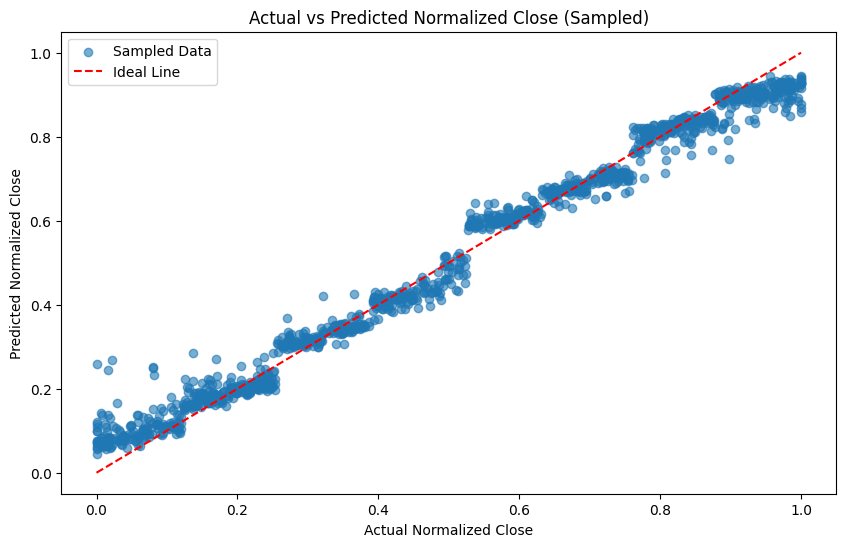

In [ ]:
# Sample the DataFrame to reduce the number of points
sampled_data = test_predictions_pd.sample(frac=0.01, random_state=42)  # 1% of the data

# Plot Actual vs Predicted for sampled data

plt.figure(figsize=(10, 6))
plt.scatter(sampled_data["NormalizedClose"], sampled_data["prediction"], alpha=0.6, label="Sampled Data")
plt.plot([sampled_data["NormalizedClose"].min(), sampled_data["NormalizedClose"].max()],
         [sampled_data["NormalizedClose"].min(), sampled_data["NormalizedClose"].max()],
         color="red", linestyle="--", label="Ideal Line")
plt.xlabel("Actual Normalized Close")
plt.ylabel("Predicted Normalized Close")
plt.title("Actual vs Predicted Normalized Close (Sampled)")
plt.legend()
plt.show()


<ipython-input-102-852085bd69b2>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = test_predictions_pd.groupby("binned_actual").agg(


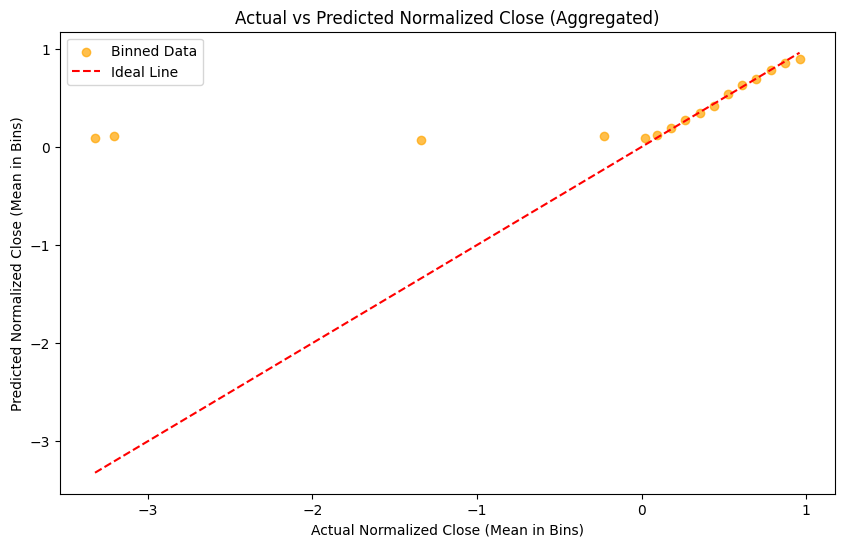

In [ ]:
# Bin the actual values and compute the mean prediction for each bin
test_predictions_pd["binned_actual"] = pd.cut(test_predictions_pd["NormalizedClose"], bins=50)
grouped = test_predictions_pd.groupby("binned_actual").agg(
    actual_mean=("NormalizedClose", "mean"),
    predicted_mean=("prediction", "mean")
).dropna()

# Plot the aggregated data
plt.figure(figsize=(10, 6))
plt.scatter(grouped["actual_mean"], grouped["predicted_mean"], label="Binned Data", color="orange", alpha=0.7)
plt.plot([grouped["actual_mean"].min(), grouped["actual_mean"].max()],
         [grouped["actual_mean"].min(), grouped["actual_mean"].max()],
         color="red", linestyle="--", label="Ideal Line")
plt.xlabel("Actual Normalized Close (Mean in Bins)")
plt.ylabel("Predicted Normalized Close (Mean in Bins)")
plt.title("Actual vs Predicted Normalized Close (Aggregated)")
plt.legend()
plt.show()


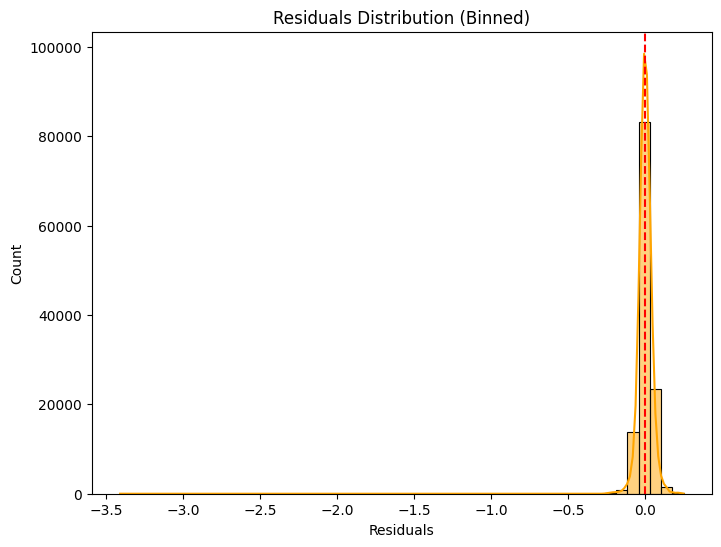

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(test_predictions_pd['residuals'], bins=50, kde=True, color="orange")
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals")
plt.title("Residuals Distribution (Binned)")
plt.show()


In [ ]:
test_predictions_pd

,NormalizedClose,prediction,residuals,within_margin,binned_actual
0,1.000000,0.909575,0.090425,1,"(0.914, 1.0]"
1,0.723810,0.709387,0.014423,1,"(0.654, 0.741]"
2,0.607143,0.629618,-0.022475,1,"(0.568, 0.654]"
3,0.751880,0.714985,0.036895,1,"(0.741, 0.827]"
4,0.379310,0.343557,0.035753,1,"(0.309, 0.395]"
...,...,...,...,...,...
123241,0.972484,0.931466,0.041018,1,"(0.914, 1.0]"
123242,0.946581,0.884784,0.061797,1,"(0.914, 1.0]"
123243,0.941595,0.884784,0.056812,1,"(0.914, 1.0]"
123244,0.977987,0.919611,0.058376,1,"(0.914, 1.0]"


## **4. Simulating Trading**

**4.1 For Meta**

In [ ]:
sim_df=spark.read.csv('/content/drive/MyDrive/bigdata/stocks/META.csv',header=True,inferSchema=True)

In [ ]:
sim_df.show()

+----------+------------------+------------------+------------------+------------------+---------+------+--------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|Symbol|           YTD Gains|
+----------+------------------+------------------+------------------+------------------+---------+------+--------------------+
|2012-05-18| 42.04999923706055|              45.0|              38.0| 38.22999954223633|573576400|  META|                 0.0|
|2012-05-21|36.529998779296875| 36.65999984741211|              33.0|34.029998779296875|168192700|  META|-0.10986138669186518|
|2012-05-22| 32.61000061035156| 33.59000015258789|30.940000534057617|              31.0|101786600|  META|-0.18911848362040018|
|2012-05-23|  31.3700008392334|              32.5|31.360000610351562|              32.0| 73600000|  META|-0.16296101535009055|
|2012-05-24| 32.95000076293945|33.209999084472656|31.770000457763672|33.029998779296875| 50237200|  META| -0.13

In [ ]:
# Rename multiple columns using a loop
new_columns = {'Close': 'close',
               'Open': 'open',
               'High': 'high',
               'Low': 'low',
               'Date': 'date',
               'Symbol': 'Name'}

for old_name, new_name in new_columns.items():
    sim_df = sim_df.withColumnRenamed(old_name, new_name)


In [ ]:
sim_df.show()

+----------+------------------+------------------+------------------+------------------+---------+----+--------------------+
|      date|              open|              high|               low|             close|   Volume|Name|           YTD Gains|
+----------+------------------+------------------+------------------+------------------+---------+----+--------------------+
|2012-05-18| 42.04999923706055|              45.0|              38.0| 38.22999954223633|573576400|META|                 0.0|
|2012-05-21|36.529998779296875| 36.65999984741211|              33.0|34.029998779296875|168192700|META|-0.10986138669186518|
|2012-05-22| 32.61000061035156| 33.59000015258789|30.940000534057617|              31.0|101786600|META|-0.18911848362040018|
|2012-05-23|  31.3700008392334|              32.5|31.360000610351562|              32.0| 73600000|META|-0.16296101535009055|
|2012-05-24| 32.95000076293945|33.209999084472656|31.770000457763672|33.029998779296875| 50237200|META| -0.1360188549621748|


In [8]:
from pyspark.sql.functions import when, lit,col
from pyspark.sql.window import Window
from pyspark.sql import functions as F
def preprocess_df(df):
    df = df.withColumn(
    "NormalizedClose",
    when((col("High") - col("Low")) == 0, lit(0.5))  # Assign 0.5 when High = Low
    .otherwise((col("Close") - col("Low")) / (col("High") - col("Low"))))

  # Define a window spec to partition by 'Name' (stock name) and order by 'date'
    window_spec = Window.partitionBy("Name").orderBy("date")

  # Adding lagged features (lag 1, lag 2)
    df = df.withColumn("NormalizedClose_Lag_1", F.lag("NormalizedClose", 1).over(window_spec))
    df = df.withColumn("NormalizedClose_Lag_2", F.lag("NormalizedClose", 2).over(window_spec))

    df = df.dropna(subset=['NormalizedClose', 'NormalizedClose_Lag_1', 'NormalizedClose_Lag_2'])
    df = df.na.drop(subset=['NormalizedClose', 'NormalizedClose_Lag_1', 'NormalizedClose_Lag_2'])

    return df

In [ ]:
df_ready=preprocess_df(sim_df)
df_ready.show()

+----------+------------------+------------------+------------------+------------------+---------+----+--------------------+--------------------+---------------------+---------------------+
|      date|              open|              high|               low|             close|   Volume|Name|           YTD Gains|     NormalizedClose|NormalizedClose_Lag_1|NormalizedClose_Lag_2|
+----------+------------------+------------------+------------------+------------------+---------+----+--------------------+--------------------+---------------------+---------------------+
|2012-05-22| 32.61000061035156| 33.59000015258789|30.940000534057617|              31.0|101786600|META|-0.18911848362040018|0.022641311162021734|   0.2814204432344882|  0.03285707746233259|
|2012-05-23|  31.3700008392334|              32.5|31.360000610351562|              32.0| 73600000|META|-0.16296101535009055|    0.56140327394895| 0.022641311162021734|   0.2814204432344882|
|2012-05-24| 32.95000076293945|33.209999084472656|

In [12]:
from pyspark.ml import PipelineModel

model_save_path = "/content/drive/MyDrive/bigdata/stocks_20241219_012402"

loaded_model = PipelineModel.load(model_save_path)

In [ ]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=['NormalizedClose', 'NormalizedClose_Lag_1', 'NormalizedClose_Lag_2'],
                            outputCol='features_for_sim')

df_ready = assembler.transform(df_ready)


In [ ]:
pred_df = loaded_model.transform(df_ready)
pred_df.show()


+----------+------------------+------------------+------------------+------------------+---------+----+--------------------+--------------------+---------------------+---------------------+--------------------+--------------------+--------------------+-------------------+
|      date|              open|              high|               low|             close|   Volume|Name|           YTD Gains|     NormalizedClose|NormalizedClose_Lag_1|NormalizedClose_Lag_2|            features|    features_for_sim|        features_out|         prediction|
+----------+------------------+------------------+------------------+------------------+---------+----+--------------------+--------------------+---------------------+---------------------+--------------------+--------------------+--------------------+-------------------+
|2012-05-22| 32.61000061035156| 33.59000015258789|30.940000534057617|              31.0|101786600|META|-0.18911848362040018|0.022641311162021734|   0.2814204432344882|  0.0328570774

In [ ]:
from pyspark.sql.functions import col, lag, lit, when, expr
from pyspark.sql.window import Window

In [ ]:
threshold = 0.02  # 2% threshold for predicted price to trigger a signal

df = pred_df.withColumn(
    "Signal",
    when((col("prediction") > col("NormalizedClose") * (1 + threshold)), 1)  # Buy signal
    .when((col("prediction") < col("NormalizedClose") * (1 - threshold)), -1)  # Sell signal
    .otherwise(0)  # Hold signal
)

In [ ]:
window = Window.orderBy("Date")
df = df.withColumn("Prev_Signal", lag("Signal", 1).over(window))
df = df.fillna({"Prev_Signal": 0})  # Replace nulls in Prev_Signal with 0


In [ ]:
#Calculating daily returns based on position and price changes
df = df.withColumn(
    "Daily_Return",
    when(
        (col("Prev_Signal") == 1) & (col("Signal") != -1),  # Holding a buy position
        (col("NormalizedClose") - lag("NormalizedClose", 1).over(window)) /
        lag("NormalizedClose", 1).over(window)  # Price change percentage
    ).otherwise(0)
)

In [ ]:
starting_balance = 10000  # Starting portfolio balance
df = df.withColumn(
    "Portfolio_Value",
    lit(starting_balance) * expr(
        "1 + sum(Daily_Return) over (rows between unbounded preceding and current row)"
    )
)

In [ ]:
final_portfolio_value = df.select("Portfolio_Value").orderBy(col("Date").desc()).first()["Portfolio_Value"]
print(f"Final Portfolio Value: {final_portfolio_value}")

Final Portfolio Value: 21121912.947771322


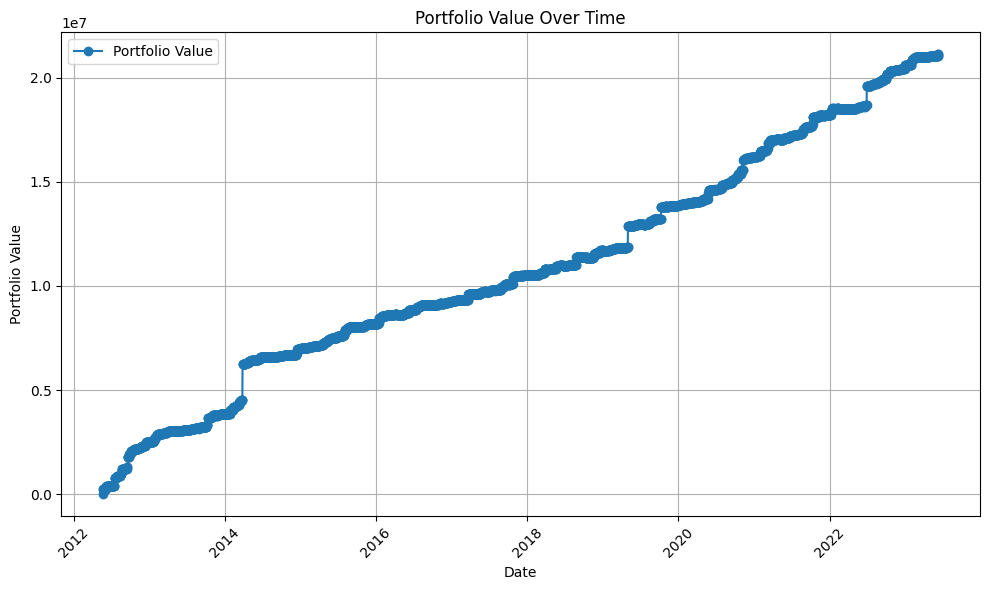

In [ ]:
portfolio_data = df.select("Date", "Portfolio_Value").orderBy("Date").toPandas()

plt.figure(figsize=(10, 6))
plt.plot(portfolio_data["Date"], portfolio_data["Portfolio_Value"], marker="o", label="Portfolio Value")
plt.title("Portfolio Value Over Time")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**4.2 For NVIDIA**

In [5]:
sim_df=spark.read.csv('/content/drive/MyDrive/bigdata/stocks/NVDA.csv',header=True,inferSchema=True)

In [ ]:
sim_df.show()

+----------+------------------+------------------+------------------+------------------+---------+------+--------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|Symbol|           YTD Gains|
+----------+------------------+------------------+------------------+------------------+---------+------+--------------------+
|2002-12-31|0.9508330225944519|0.9833329916000366|0.9325000047683716|0.9591670036315918| 82539600|  NVDA|                 0.0|
|2003-01-02|               1.0| 1.037500023841858|0.9658330082893372| 1.025833010673523|130254000|  NVDA| 0.06950406632997241|
|2003-01-03|1.0291670560836792|            1.0625|1.0083329677581787| 1.025833010673523|103749600|  NVDA| 0.06950406632997241|
|2003-01-06| 1.050832986831665|1.1258330345153809|1.0499999523162842|1.1091669797897339|103342800|  NVDA| 0.15638567172370732|
|2003-01-07|1.1308330297470093|1.1566669940948486|1.0933330059051514|1.1058330535888672|149827200|  NVDA| 0.152

In [6]:
# Rename multiple columns using a loop
new_columns = {'Close': 'close',
               'Open': 'open',
               'High': 'high',
               'Low': 'low',
               'Date': 'date',
               'Symbol': 'Name'}

for old_name, new_name in new_columns.items():
    sim_df = sim_df.withColumnRenamed(old_name, new_name)


In [25]:
df_ready=preprocess_df(sim_df)
df_ready.show()

+----------+------------------+------------------+------------------+------------------+---------+----+--------------------+--------------------+---------------------+---------------------+
|      date|              open|              high|               low|             close|   Volume|Name|           YTD Gains|     NormalizedClose|NormalizedClose_Lag_1|NormalizedClose_Lag_2|
+----------+------------------+------------------+------------------+------------------+---------+----+--------------------+--------------------+---------------------+---------------------+
|2003-01-03|1.0291670560836792|            1.0625|1.0083329677581787| 1.025833010673523|103749600|NVDA| 0.06950406632997241| 0.32307553489764207|   0.8372052599318182|   0.5246002748476847|
|2003-01-06| 1.050832986831665|1.1258330345153809|1.0499999523162842|1.1091669797897339|103342800|NVDA| 0.15638567172370732|   0.780227121958581|  0.32307553489764207|   0.8372052599318182|
|2003-01-07|1.1308330297470093|1.1566669940948486|

In [26]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=['NormalizedClose', 'NormalizedClose_Lag_1', 'NormalizedClose_Lag_2'],
                            outputCol='f')


In [27]:
df_ready = assembler.transform(df_ready)

pred_df = loaded_model.transform(df_ready)
pred_df.show()

+----------+------------------+------------------+------------------+------------------+---------+----+--------------------+--------------------+---------------------+---------------------+--------------------+--------------------+-------------------+
|      date|              open|              high|               low|             close|   Volume|Name|           YTD Gains|     NormalizedClose|NormalizedClose_Lag_1|NormalizedClose_Lag_2|                   f|        features_out|         prediction|
+----------+------------------+------------------+------------------+------------------+---------+----+--------------------+--------------------+---------------------+---------------------+--------------------+--------------------+-------------------+
|2003-01-03|1.0291670560836792|            1.0625|1.0083329677581787| 1.025833010673523|103749600|NVDA| 0.06950406632997241| 0.32307553489764207|   0.8372052599318182|   0.5246002748476847|[0.32307553489764...|[0.32307553489764...| 0.3374389762

In [ ]:
from pyspark.sql.functions import col, lag, lit, when, expr
from pyspark.sql.window import Window

In [ ]:

threshold = 0.02  # 2% threshold for predicted price to trigger a signal

df = pred_df.withColumn(
    "Signal",
    when((col("prediction") > col("NormalizedClose") * (1 + threshold)), 1)  # Buy signal
    .when((col("prediction") < col("NormalizedClose") * (1 - threshold)), -1)  # Sell signal
    .otherwise(0)  # Hold signal
)


In [ ]:
window = Window.orderBy("Date")
df = df.withColumn("Prev_Signal", lag("Signal", 1).over(window))
df = df.fillna({"Prev_Signal": 0})  # Replace nulls in Prev_Signal with 0

In [ ]:
 #Calculating daily returns based on position and price changes
df = df.withColumn(
    "Daily_Return",
    when(
        (col("Prev_Signal") == 1) & (col("Signal") != -1),  # Holding a buy position
        (col("NormalizedClose") - lag("NormalizedClose", 1).over(window)) /
        lag("NormalizedClose", 1).over(window)  # Price change percentage
    ).otherwise(0)
)

In [ ]:
starting_balance = 10000  # Starting portfolio balance
df = df.withColumn(
    "Portfolio_Value",
    lit(starting_balance) * expr(
        "1 + sum(Daily_Return) over (rows between unbounded preceding and current row)"
    )
)


In [ ]:
final_portfolio_value = df.select("Portfolio_Value").orderBy(col("Date").desc()).first()["Portfolio_Value"]
print(f"Final Portfolio Value: {final_portfolio_value}")

Final Portfolio Value: 66825223.92286272


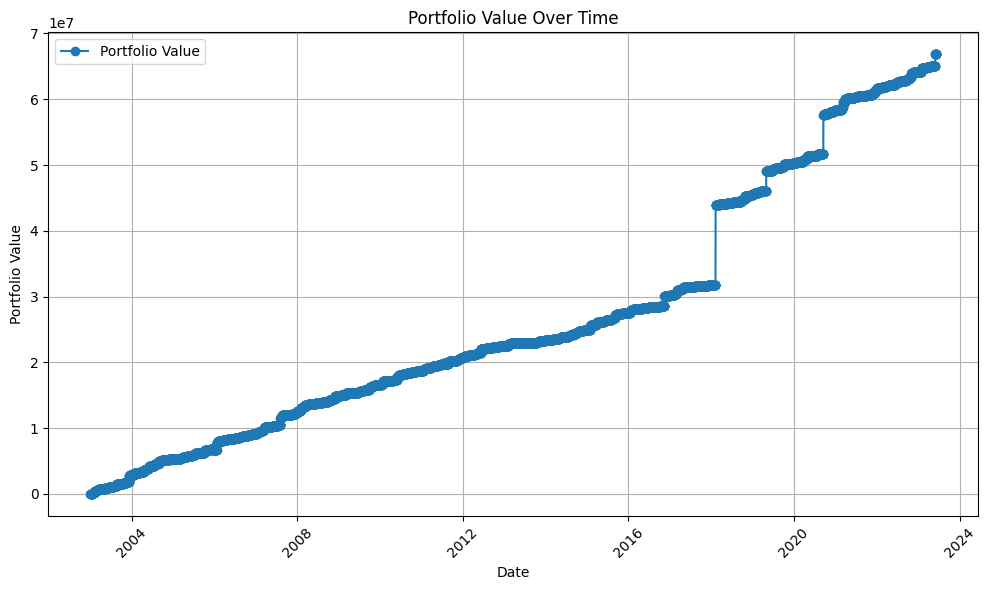

In [ ]:
portfolio_data = df.select("Date", "Portfolio_Value").orderBy("Date").toPandas()

plt.figure(figsize=(10, 6))
plt.plot(portfolio_data["Date"], portfolio_data["Portfolio_Value"], marker="o", label="Portfolio Value")
plt.title("Portfolio Value Over Time")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**4.2.1 Exploratory Data Analysis For NVIDIA**

In [35]:
df=df_ready.toPandas()

In [36]:
df.head()

,date,open,high,low,close,Volume,Name,YTD Gains,NormalizedClose,NormalizedClose_Lag_1,NormalizedClose_Lag_2,f
0,2003-01-03,1.029167,1.062500,1.008333,1.025833,103749600,NVDA,0.069504,0.323076,0.837205,0.524600,"[0.32307553489764207, 0.8372052599318182, 0.52..."
1,2003-01-06,1.050833,1.125833,1.050000,1.109167,103342800,NVDA,0.156386,0.780227,0.323076,0.837205,"[0.780227121958581, 0.32307553489764207, 0.837..."
2,2003-01-07,1.130833,1.156667,1.093333,1.105833,149827200,NVDA,0.152910,0.197367,0.780227,0.323076,"[0.19736713320935695, 0.780227121958581, 0.323..."
3,2003-01-08,1.077500,1.109167,0.988333,0.995833,185252400,NVDA,0.038227,0.062069,0.197367,0.780227,"[0.06206856749362932, 0.19736713320935695, 0.7..."
4,2003-01-09,1.026667,1.037500,1.003333,1.013333,143607600,NVDA,0.056472,0.292679,0.062069,0.197367,"[0.2926793527182901, 0.06206856749362932, 0.19..."


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df['SMA_50'] = df['close'].rolling(window=50).mean()
df['SMA_200'] = df['close'].rolling(window=200).mean()


df["trend"] = np.where(df["SMA_50"] > df["SMA_200"], "Bullish",
              np.where(df["SMA_50"] < df["SMA_200"], "Bearish", "Neutral"))


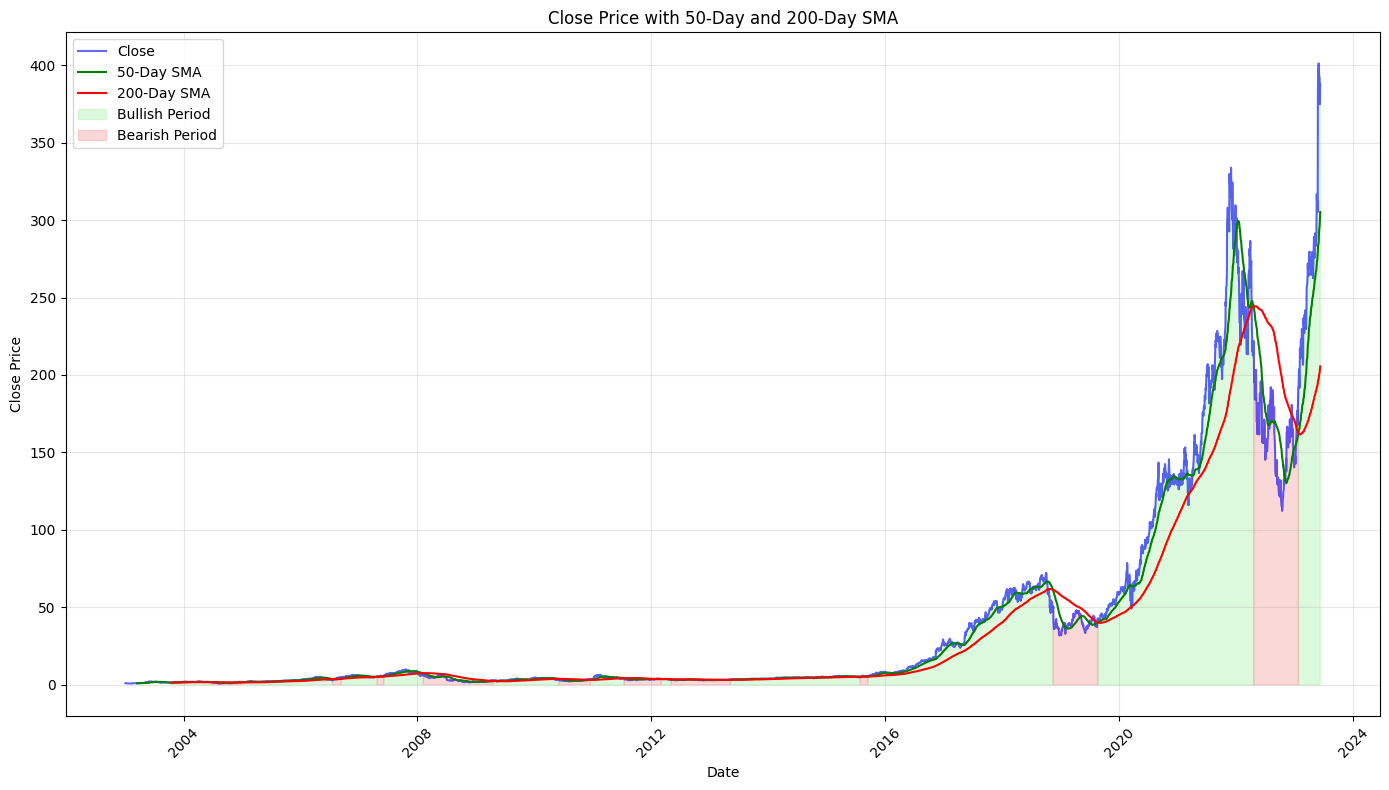

In [41]:
plt.figure(figsize=(14, 8))
plt.plot(df['date'], df['close'], label='Close', color='blue', alpha=0.6)
plt.plot(df['date'], df['SMA_50'], label='50-Day SMA', color='green', linewidth=1.5)
plt.plot(df['date'], df['SMA_200'], label='200-Day SMA', color='red', linewidth=1.5)

df['Bullish'] = (df["trend"] == "Bullish")
df['Bearish'] = (df["trend"] == "Bearish")
df['Neutral'] = (df["trend"] == "Neutral")

plt.fill_between(df['date'], df['close'], where=df['Bullish'], color='lightgreen', alpha=0.3, label='Bullish Period')
plt.fill_between(df['date'], df['close'], where=df['Bearish'], color='lightcoral', alpha=0.3, label='Bearish Period')

plt.title('Close Price with 50-Day and 200-Day SMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()
